# Parameters Run by axionCAMB

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)

# redshift list matching axionCAMB
zlist = np.linspace(0,4.5,301)
#fiducial parameter values as given in table 3 of Planck 2015 (arxiv 1502.01589)
fv = [0.02225,0.1198,0.0001,10**-27,67.27,0.9645]
#parameter confidence intervals as given in table 3 of Planck 2015 (arxiv 1502.01589)
ci = [0.00016,0.0015,'n/a','n/a',0.66,0.0049]
#number of axioncamb runs for each parameter
runs = 9
#run values for omega_baryon
omegab = np.round(np.linspace(fv[0]-ci[0],fv[0]+ci[0],runs),5)
#run values for omega_cdm
omegac = np.round(np.linspace(fv[1]-ci[1],fv[1]+ci[1],runs),4)
#run values for omega_cdm and omega_axion used to run the desired axion fractions
fa = np.linspace(0.0001,0.2,9)
omegaax = fv[1]*fa
omegac2 = fv[1]-omegaax
fa_zip = zip(omegac2,omegaax)
#run values for hubble constant
h0 = np.round(np.linspace(fv[4]-ci[4],fv[4]+ci[4],runs),2)
#run values for scalar tilt
ns = np.round(np.linspace(fv[5]-ci[5],fv[5]+ci[5],runs),4)
#run values for axion mass
ma = np.logspace(-29,-22,11)
params = []
params.append(omegab)
params.append(omegac)
params.append(fa)
params.append(ns)
params.append(h0)

# Cosmological Evolution

In [2]:
# computes angular diameter distance
def d_a(z, c = 2.998*np.power(10.,5), H0 = 67.27):
    dz = (z[-1]-z[0])/len(z)
    dalist = []
    for i in range(len(z)):
        ztest = np.linspace(0.,z[i],z[i]/dz)
        integral = (c/H0)*np.trapz((omegam*(1.+ztest)**3+omegal)**(-0.5),ztest,dz)
        dalist.append(np.float_(integral/(1.+ztest[-1:])))
    dalist[0] = 0.01
    dalist[1] = 0.01
    return dalist       

# computes redshift evolution of the Hubble constant
def h(z, H0 = 67.27, omegam = 0.3, omegal = 0.7):
    hz = H0*np.sqrt(omegam*(1.+z)**3.+omegal)
    return hz

In [3]:
# a,gr = np.loadtxt('../old_code/grhoax',unpack = True,usecols = [0,1])
# print(np.shape(a),np.shape(gr))
# plt.loglog(a,gr)
# plt.show()

# z = (1/a)-1

# grhoax_late = []
# grhoax3 = gr[-1]
# aplot = []
# a_late = np.arange(a[-1],1.02,0.01)
# for i in range(len(a_late)-1):
#     aplot.append(a_late[i])
#     grhoax3 *= (a[i]/a[i+1])**3
#     grhoax_late.append(grhoax3)
# print(grhoax_late,np.shape(grhoax_late),np.shape(a_late))
# #del a_late[-1]
# print(aplot)

# aosc = a[-1]
# grosc = gr[-1]
# a2 = np.arange(aosc,1.01,0.01)
# gr2 = grosc*((aosc/a2)**3)

# z = (1./a)-1.
# z2 = (1./a2)-1.

# fix,ax = plt.subplots()
# ax.plot(z,gr)
# ax.plot(z2,gr2,'r')
# plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(0.0001,0.0003)
# #plt.ylim(10**6,10**8)
# plt.xlabel('$z$')
# plt.show()

# Plot Axion Effects on $P(k)$

fa =  0.10005000000000001 [0.2     0.10005]
mass =  1.2589254117941712e-27 [1.25892541e-27 1.00000000e-22]


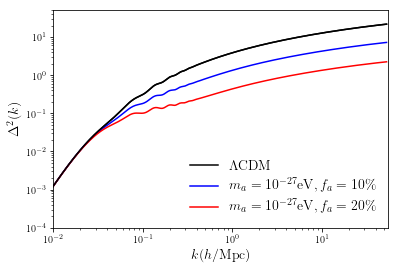

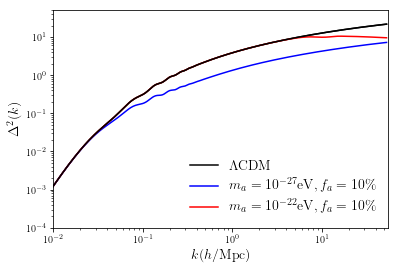

In [15]:
fa_index1 = 4
fa_index2 = [8,4]
ma_index1 = 3
ma_index2 = [3,10]
print('fa = ',fa[fa_index1], fa[fa_index2])
print('mass = ',ma[ma_index1],ma[ma_index2])

# k = np.reshape(np.load('../data2/k.npy')[:,:,:,::-1],(5,11,9,1,1,len(zlist),660))
# pk = np.reshape(np.load('../data2/pk.npy')[:,:,:,::-1],(5,11,9,1,1,len(zlist),660))
# pkdimless = (np.power(k,3)*pk)/(2*(np.pi**2))

plt.loglog(k[2][0][0][0][0][0],pkdimless[2][0][0][0][0][0],color = 'k',label = r'$\Lambda {\rm CDM}$')
plt.loglog(k[2][ma_index1][fa_index1][0][0][0],pkdimless[2][ma_index1][fa_index1][0][0][0],color = 'b',label = r'$m_a = 10^{-27}{\rm eV}, f_a = 10\%$')
plt.loglog(k[2][ma_index2[0]][fa_index2[0]][0][0][0],pkdimless[2][ma_index2[0]][fa_index2[0]][0][0][0],color = 'r',label = r'$m_a = 10^{-27}{\rm eV}, f_a = 20\%$')
plt.loglog(k[2][0][0][0][0][0],pkdimless[2][0][0][0][0][0],color = 'k')
plt.legend(frameon = False,loc = 'lower right',fontsize = 14)
plt.xlabel(r'$k (h/{\rm Mpc})$',size = 14)
#plt.ylabel(r'$P(k) ({\rm Mpc}/h)^3$',size = 14)
plt.ylabel(r'$\Delta^2(k)$',size = 14)
plt.xlim(0.01,55)
plt.ylim(0.0001,50)
plt.savefig('pk_fraction.pdf')
plt.show()
plt.close('all')


plt.loglog(k[2][0][0][0][0][0],pkdimless[2][0][0][0][0][0],color = 'k',label = r'$\Lambda {\rm CDM}$')
plt.loglog(k[2][ma_index1][fa_index1][0][0][0],pkdimless[2][ma_index1][fa_index1][0][0][0],color = 'b',label = r'$m_a = 10^{-27}{\rm eV}, f_a = 10\%$')
plt.loglog(k[2][ma_index2[1]][fa_index2[1]][0][0][0],pkdimless[2][ma_index2[1]][fa_index2[1]][0][0][0],color = 'r',label = r'$m_a = 10^{-22}{\rm eV}, f_a = 10\%$')
plt.loglog(k[2][0][0][0][0][0],pkdimless[2][0][0][0][0][0],color = 'k')
plt.legend(frameon = False,loc = 'lower right',fontsize = 14)
plt.xlabel(r'$k (h/{\rm Mpc})$',size = 14)
#plt.ylabel(r'$P(k) ({\rm Mpc}/h)^3$',size = 14)
plt.ylabel(r'$\Delta^2(k)$',size = 14)
plt.xlim(0.01,55)
plt.ylim(0.0001,50)
plt.savefig('pk_mass.pdf')
plt.show()
plt.close('all')